<a href="https://colab.research.google.com/github/Teomorales20/se-alesysistemas-/blob/main/Soluci%C3%B3n_Parcial_1_SyS_Luis_Mateo_Morales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solución - Parcial 1: Conceptos Basicos y Serie de Fourier Señales y Sistemas 2025-I

#Preguntas
## Ejercicio 1:

Se tiene un microprocesador de 5 bits con entrada analoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

$$x(t) = 20 \sin(7t - \pi/2) - 3 \cos(5t) + 2 \cos(10t)$$

Presente las simulaciones y graficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos perıodos de la señal estudiada.

In [ ]:
#Importamos la biblioteca numpy como np para operaciones numéricas.
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
#Transformación lineal (cero y pendiente)
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min y max despues de cero y pendiente
  '''
  xmax = 25
  xmin = -25 # x.min()
  # Calcula la pendiente (m) de la transformación lineal
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin # Calcula la intersección con el eje y (b)
  yv = m*x + b # Aplica la transformación lineal a la señal de entrada
  return yv # Retorna la señal después de la transformación

# Define la función para cuantizar la seña
def my_cuantizador(yn, vq) : #yn punto a cuantizar, vq vector de estados

  Ne = vq.shape[0]  #Obtiene el número de estados de cuantización
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1)) #Calcula la distancia de cada muestra al vector de estados de cuantización
  ind = np.argmin(dn) #posición distancia min
  return vq[ind] #Retorna el valor a la distancia min


In [ ]:
#Define los parámetros para las componentes de la señal
A1 = 20  # Amplitud de la primera componente (senoidal)
A2 = -3  # Amplitud de la primera componente (cosenoidal)
A3 = 2   # Amplitud de la segunda componente (cosenoidal)

# Períodos de cada componente
T_1 = (2/7)*np.pi  # Cos 1
T_2 = (2/5)*np.pi  # Cos 2
T_3 = (2/10)*np.pi

# Frecuencia angular de las componentes
w1=7
w2=5
w3=10

# Frecuencia de cada componente (Hz)
f1=1/T_1
f2=1/T_2
f3=1/T_3

ti = 0 #tiempo inicial
tf = 4*T_2 #tiempo final
Fs = 36 # frecuencia de muestreo Hz
Ts = 1/Fs # Periodo de muestreo
tv = np.arange(ti,tf,Ts) # Vector de tiempo discretizado
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #Generación de la señal original en el tiempo

#cero y pendiente
ymin = -3.3
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #continua

In [ ]:
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="b", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Señal discretizada")

#Ejercicio 2:

Cual es la señal obtenida en tiempo discreto al utilizar un conversor analogo digital con frecuencia de muestreo de $5kHz$, aplicado a la senal:

$x(t) = 3 cos(1000πt) + 5 sin(2000πt) + 10 cos(11000πt)? $.

Realizar la simulacion del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe implemente un conversor adecuado para la senal estudiada.   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros de la señal
f1 = 500   # Hz
f2 = 1000  # Hz
f3 = 5500  # Hz
fs_high = 100000  # Frecuencia de muestreo alta para simular señal "continua"
t_high = np.arange(0, 0.01, 1/fs_high)  # Vector de tiempo para la señal "continua" 0.01 segundos (para mejor visualización)

# Generar la señal original
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) + # Componente cosenoidal a 500 Hz
          5 * np.sin(2 * np.pi * f2 * t_high) + # Componente senoidal a 1000 Hz
          10 * np.cos(2 * np.pi * f3 * t_high)) # Componente cosenoidal a 5500 Hz

# Diseñar filtro antialiasing (Butterworth)
nyquist = 0.5 * fs_high # Calcula la frecuencia de Nyquist para la alta frecuencia de muestreo
cutoff = 2500  # Frecuencia de corte del filtro
order = 6 #Orden del filtro
normal_cutoff = cutoff / nyquist # Normaliza la frecuencia de corte respecto a la frecuencia de Nyquist
b, a = signal.butter(order, normal_cutoff, btype='low') #Diseña un filtro Butterworth pasa-bajo

# Aplicar filtro a la señal "continua"
x_filtered = signal.filtfilt(b, a, x_high)

# Muestrear a 5 kHz después del filtro
fs_low = 5000  # 5 kHz
factor = int(fs_high / fs_low) # Calcula el factor de submuestreo
x_filtered_low = x_filtered[::factor] # Submuestrea la señal filtrada
t_low = t_high[::factor] # Obtiene el vector de tiempo correspondiente a la señal submuestreada

# Calcular FFTs (Transformada Rápida de Fourier)
fft_high = np.fft.rfft(x_high) # Calcula la FFT de la señal original (solo parte real)
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high) # Obtiene las frecuencias correspondientes a la FFT de la señal original
fft_filtered = np.fft.rfft(x_filtered_low) # Calcula la FFT de la señal discretizada después del filtro
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low) # Obtiene las frecuencias correspondientes a la FFT de la señal discretizada

# Graficar en tiempo y frecuencia
plt.figure(figsize=(12, 10))

# Señal original en tiempo
plt.subplot(3, 2, 1) # Crea el primer subplot (3 filas, 2 columnas, posición 1)
plt.plot(t_high, x_high, label='Original') # Grafica la señal original en el tiempo
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Limita el eje x para mostrar los primeros 5 ms

# Señal original en frecuencia
plt.subplot(3, 2, 2) #Crea el segundo subplot
plt.plot(freqs_high, np.abs(fft_high))
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000) # Limita el eje x para mostrar frecuencias hasta 6000 Hz

# Señal filtrada en tiempo
plt.subplot(3, 2, 3) # Crea el tercer subplot
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Limita el eje x para mostrar los primeros 5 ms

# Señal filtrada en frecuencia
plt.subplot(3, 2, 4) # Crea el cuarto subplo
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000) # Limita el eje x para mostrar frecuencias hasta 6000 Hz

# Señal discretizada en tiempo
plt.subplot(3, 2, 5) # Crea el quinto subplot
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005) # Limita el eje x para mostrar los primeros 5 ms

# Señal discretizada en frecuencia
plt.subplot(3, 2, 6) # Crea el sexto subplot
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500) # Limita el eje x para mostrar frecuencias hasta 2500 Hz

plt.tight_layout() # Ajusta automáticamente los parámetros de los subplots para evitar superposiciones
plt.show()  #Muestra la figura con todos los subplots

# Valores de las muestras discretas (primeras 10 muestras)
print("\nPrimeras 10 muestras de la señal discretizada:")
print(np.round(x_filtered_low[:10], 4)) # Imprime las primeras 10 muestras redondeadas a 4 decimales

# Explicación
print("Conclusión:") # Imprime un encabezado para la conclusión
print("- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).")
print("- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.")
print("- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.")

#Ejercicio 3:

La distancia media entre dos señales $x1(t), x2(t) ∈ R, C,$ se
puede expresar a partir de la potencia media:

$$d(x_1,x_2)=\bar{P}_{x_1-x_2}= \lim_{T\to\infty}\frac{1}{T}\int_{T} \lvert x_1(t)-x_2(t)\rvert^{2}\,dt.$$

Sean $x1(t) y$ $x2(t):$

$$
x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T}, \quad T, A \in \mathbb{R}^+$$

$$
x_2(t) =
\begin{cases}
1, & \text{si } 0 \leq t < \frac{T}{4} \\
-1, & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1, & \text{si } \frac{3T}{4} \leq t < T
\end{cases}$$

¿Cual es la distancia media entre las señales?. Corrobore sus desarrollos con Sympy.

In [ ]:
import sympy as sp

# Se definen las variables simbolicas a utilizar.
A,t, T = sp.symbols('A t T', real=True, positive=True)
w0 = 2 * sp.pi / T
# Definición de las señales
x1 = A*sp.cos(w0 * t)

# Definición por partes de ambas funciones, esto mediante .piecewise,que permite que una función tenga distintos valores en diferentes intervalos de t.
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Función a integrar se define como f: (calcula la diferencia al cuadrado entre las dos señales x1, x2)
f = (x1 - x2)**2

# Se emplea la integral tramo por tramo, para al final sumarlas.
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Para este punto se tiene en cuenta que la distancia se define como la división de la integral dada entre el periodo.
distancia_media = integral / T

# Simplificación de la expresión de la distancia
distancia_media_simplificada = sp.simplify(distancia_media) # Simplifica la expresión de la distancia media


distancia_media_simplificada # Muestra la expresión simplificada de la distancia media

#Ejercicio 4:

Sea $x′′(t)$ la segunda derivada de la senal $x(t),$ donde $t ∈
[ti , tf ].$ Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular segun:

$$c_n = \frac{1}{(t_i - t_f)n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-jn\omega_0 t} \, dt, \quad n \in \mathbb{Z}$$

¿Como se pueden calcular los coeficientes $an$ y $bn$ desde
$x′′ (t)$ en la serie trigonometrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte
real, parte imaginaria y el error relativo de reconstruccion´
para n∈{0, ±1, ±2, ±3, ±4, ±5}, a partir de $x′′ (t)$ para la
senal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido
con la estimacion a partir de $x(t)$ y presente las respectivas
simulaciones sobre Python.

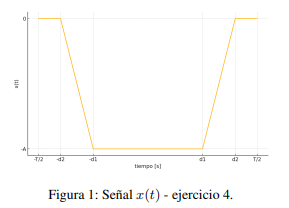

In [ ]:
'''Importar las bibliotecas necesarias'''
from ipywidgets import interact,IntSlider

#Parametros  relacionados a la forma y escala de la señal a generar
A=1 #Amplitud de la señal
d2=2
d1=1

#Generar señal parametrizada en función del tiempo
T = 2*d2 # Duración total de la señal para ser graficada
Fo = 1/T # Frecuencia fundamental de la señal
Fs = 1000*Fo # Frecuencia de muestreo
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo, el cual esta formado valores espaciados en secuencia dentro del intervalo.
Nm = len(tv) #Número de estados de cuantización.

#Genera valores basados en la figura geometrica del trapecio, siendo x, la variable con la que esta trabajara, y a,b,c,d serán los que definiran la forma del mismo.
def funcion_trapecio(x, a, b, c, d):
    """

    Parámetros:
x: Un arreglo de NumPy con los valores del eje x.
a: La coordenada x donde comienza la pendiente ascendente del trapecio.
b: La coordenada x donde comienza la parte plana (meseta) del trapecio.
c: La coordenada x donde termina la parte plana (meseta) del trapecio.
d: La coordenada x donde termina la pendiente descendente del trapecio.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = funcion_trapecio(tv, -d2, -d1, d1, d2)



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# Creación de bases, funciones de base para las series exponenciales de Fourier, en esta se usaran exponenciales complejos como base.
phin = np.zeros((Nm,2*N+1),np.complex128)#arreglo de ceros que guardara las bases exponenciales complejas.
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés, va ir con el armonico de -a hacia +a. Donde calculara el exponencial complejo de cada armonico n.

#Calcula el espectro,pero con los coeficientes de series de Fourier basados en la señal del trapecio hecha previamente.
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #Vector de armonicos
Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi*2*nv*2)
Cn[N] = 3/4 #Nivel DC (Componente real)

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
Px = 2/3 # Potencia de la señal original

# La función pltest, ayuda a la reconstrucción y grafico de la señal
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))